In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [13]:
## loading the data
df= pd.read_csv('diabetes.csv')

In [14]:
df


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [15]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [16]:
## descriptive statistics
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [17]:
## checking null values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [18]:
# check info of features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


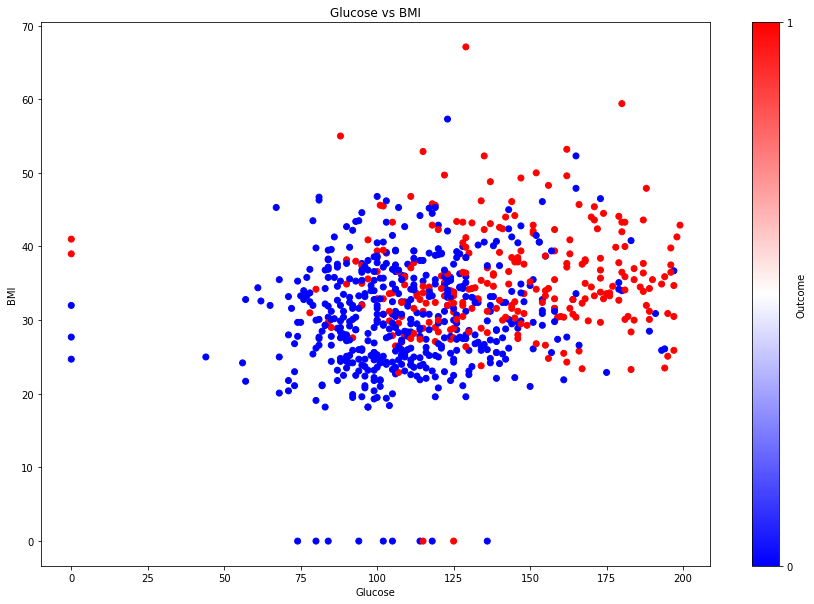

In [20]:
## EDA
plt.figure(figsize=(15,10))
plt.scatter(data['Glucose'], data['BMI'], c=data['Outcome'], cmap='bwr')
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.title('Glucose vs BMI')
plt.colorbar(ticks=[0, 1], label='Outcome')
plt.show()


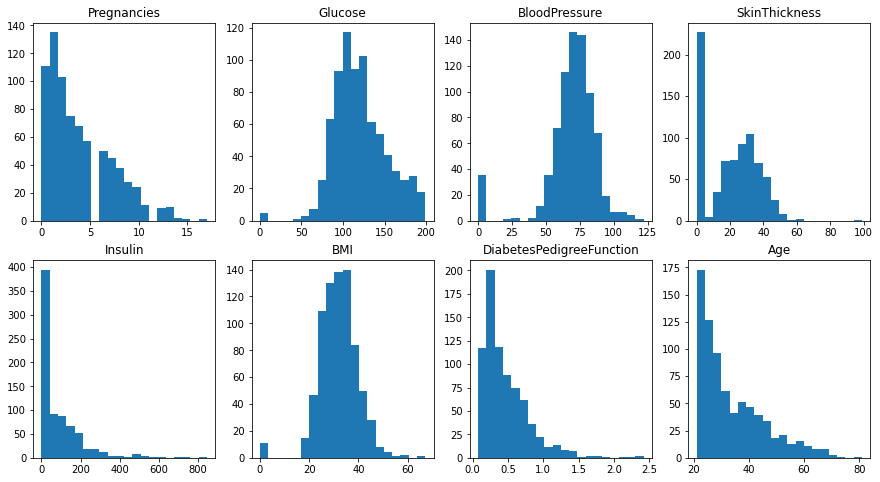

In [21]:

fig, axs = plt.subplots(2, 4, figsize=(15, 8))
for i, ax in enumerate(axs.ravel()):
    ax.hist(data.iloc[:, i], bins=20)
    ax.set_title(data.columns[i])

plt.show()

Text(0.5, 1.0, 'Correlation matrix')

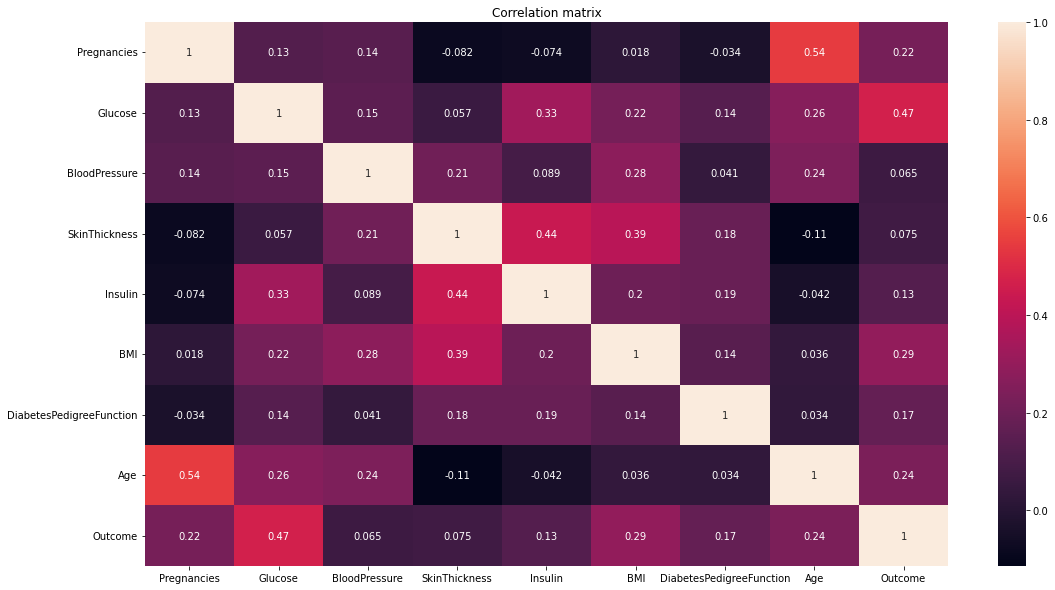

In [23]:
# Correlation matrix
plt.figure(figsize=(18,10))
sns.heatmap(df.corr(), annot = True)
plt.title('Correlation matrix')

In [24]:
## over sampling the dataset
from imblearn.over_sampling import SMOTE

In [25]:
x= df.drop('Outcome', axis='columns')
y=df['Outcome']
smote=SMOTE(sampling_strategy = 'auto')
x_sm, y_sm = smote.fit_resample(x,y)

In [26]:
y_sm.value_counts()

1    500
0    500
Name: Outcome, dtype: int64

In [27]:
x_sm

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.600000,0.627000,50
1,1,85,66,29,0,26.600000,0.351000,31
2,8,183,64,0,0,23.300000,0.672000,32
3,1,89,66,23,94,28.100000,0.167000,21
4,0,137,40,35,168,43.100000,2.288000,33
...,...,...,...,...,...,...,...,...
995,8,139,93,0,0,33.179986,0.750650,44
996,3,124,80,0,0,32.669672,0.541475,26
997,3,185,70,37,309,35.390643,0.904441,25
998,4,130,81,0,0,36.919413,0.698969,40


In [28]:
y_sm

0      1
1      0
2      1
3      0
4      1
      ..
995    1
996    1
997    1
998    1
999    1
Name: Outcome, Length: 1000, dtype: int64

In [29]:
## scaling the dataset
from sklearn.preprocessing import StandardScaler

In [30]:
scaler= StandardScaler()
x_sm[x_sm.columns]= scaler.fit_transform(x_sm[x_sm.columns])

In [31]:
x_sm

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.599904,0.697322,0.109126,0.858742,-0.731400,0.125248,0.406191,1.456227
1,-0.905879,-1.258831,-0.210892,0.481383,-0.731400,-0.807022,-0.433298,-0.248432
2,1.202217,1.784074,-0.317564,-1.342515,-0.731400,-1.246521,0.543064,-0.158713
3,-0.905879,-1.134631,-0.210892,0.104025,0.031837,-0.607250,-0.992957,-1.145621
4,-1.207035,0.355772,-1.597634,0.858742,0.632682,1.390471,5.458333,-0.068994
...,...,...,...,...,...,...,...,...
995,1.202217,0.417872,1.229188,-1.342515,-0.731400,0.069310,0.782287,0.917914
996,-0.303566,-0.047879,0.535816,-1.342515,-0.731400,0.001345,0.146057,-0.697026
997,-0.303566,1.846174,0.002453,0.984528,1.777537,0.363728,1.250064,-0.786745
998,-0.002409,0.138421,0.589152,-1.342515,-0.731400,0.567332,0.625094,0.559038


In [32]:
## Splitting the dataset into train and test
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test= train_test_split(x_sm,y_sm,test_size=0.2,random_state=42)

In [34]:
# importing more libraries
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.layers import Dropout


In [64]:
# Building model 1
model= Sequential()
model.add(tensorflow.keras.layers.Input(shape=8,))
model.add(tensorflow.keras.layers.Dense(256,activation='relu'))
model.add(tensorflow.keras.layers.Dropout(0.3))
model.add(tensorflow.keras.layers.Dense(64, activation='relu'))
model.add(tensorflow.keras.layers.Dropout(0.3))
model.add(tensorflow.keras.layers.Dense(32, activation='relu'))
model.add(tensorflow.keras.layers.Dense(1, activation='sigmoid'))



In [65]:
# Compile model 1
model.compile(optimizer='adam',loss='binary_crossentropy', metrics= 'accuracy')

In [66]:
# fit model 1
model.fit(x_train,y_train, epochs=30, verbose=1)

Epoch 1/30
25/25 [==============================] - 1s 4ms/step - loss: 0.6232 - accuracy: 0.6950
Epoch 2/30
25/25 [==============================] - 0s 3ms/step - loss: 0.5392 - accuracy: 0.7462
Epoch 3/30
25/25 [==============================] - 0s 3ms/step - loss: 0.4823 - accuracy: 0.7550
Epoch 4/30
25/25 [==============================] - 0s 3ms/step - loss: 0.4839 - accuracy: 0.7738
Epoch 5/30
25/25 [==============================] - 0s 3ms/step - loss: 0.4707 - accuracy: 0.7775
Epoch 6/30
25/25 [==============================] - 0s 3ms/step - loss: 0.4516 - accuracy: 0.7987
Epoch 7/30
25/25 [==============================] - 0s 3ms/step - loss: 0.4548 - accuracy: 0.7887
Epoch 8/30
25/25 [==============================] - 0s 3ms/step - loss: 0.4459 - accuracy: 0.7900
Epoch 9/30
25/25 [==============================] - 0s 3ms/step - loss: 0.4486 - accuracy: 0.8012
Epoch 10/30
25/25 [==============================] - 0s 3ms/step - loss: 0.4363 - accuracy: 0.7962
Epoch 11/30
25/25 [

In [67]:
y_pred1=model.predict(x_test)

7/7 [==============================] - 0s 3ms/step


In [69]:
import numpy as np
y_pred1 = np.where(y_pred1<0.5,0,1)

In [70]:
from sklearn import metrics
metrics.accuracy_score(y_test,y_pred1)

0.775

In [71]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred1))


              precision    recall  f1-score   support

           0       0.81      0.71      0.76        99
           1       0.75      0.84      0.79       101

    accuracy                           0.78       200
   macro avg       0.78      0.77      0.77       200
weighted avg       0.78      0.78      0.77       200



In [73]:
# Build model2
model2= Sequential()
model2.add(tensorflow.keras.layers.Input(shape=8,))
model2.add(tensorflow.keras.layers.Dense(24,activation='relu'))
model2.add(tensorflow.keras.layers.Dense(48, activation='relu'))
model2.add(tensorflow.keras.layers.Dense(96, activation='relu'))
model2.add(tensorflow.keras.layers.Dense(1, activation='sigmoid'))

In [76]:
# Compile model 2
model2.compile(optimizer = 'Adagrad', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [77]:
model2= model.fit(x_train, y_train, epochs=10, batch_size=32, verbose = 1)

Epoch 1/10
25/25 [==============================] - 0s 3ms/step - loss: 0.3850 - accuracy: 0.8263
Epoch 2/10
25/25 [==============================] - 0s 3ms/step - loss: 0.3600 - accuracy: 0.8500
Epoch 3/10
25/25 [==============================] - 0s 3ms/step - loss: 0.3764 - accuracy: 0.8213
Epoch 4/10
25/25 [==============================] - 0s 3ms/step - loss: 0.3730 - accuracy: 0.8425
Epoch 5/10
25/25 [==============================] - 0s 3ms/step - loss: 0.3668 - accuracy: 0.8350
Epoch 6/10
25/25 [==============================] - 0s 3ms/step - loss: 0.3650 - accuracy: 0.8313
Epoch 7/10
25/25 [==============================] - 0s 4ms/step - loss: 0.3763 - accuracy: 0.8325
Epoch 8/10
25/25 [==============================] - 0s 3ms/step - loss: 0.3561 - accuracy: 0.8363
Epoch 9/10
25/25 [==============================] - 0s 3ms/step - loss: 0.3639 - accuracy: 0.8375
Epoch 10/10
25/25 [==============================] - 0s 4ms/step - loss: 0.3611 - accuracy: 0.8537


In [78]:
y_pred2=model.predict(x_test)

7/7 [==============================] - 0s 2ms/step


In [79]:
y_pred2 = np.where(y_pred2<0.5,0,1)

In [80]:
from sklearn import metrics
metrics.accuracy_score(y_test,y_pred2)

0.77

In [81]:
print(classification_report(y_test, y_pred2))


              precision    recall  f1-score   support

           0       0.82      0.69      0.75        99
           1       0.74      0.85      0.79       101

    accuracy                           0.77       200
   macro avg       0.78      0.77      0.77       200
weighted avg       0.78      0.77      0.77       200

